<a href="https://colab.research.google.com/github/vishesh711/Machine-Learning-Practice/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Networks
Neural Networks are a subset of machine learning algorithms, specifically designed to simulate the way the human brain processes information. They are the foundation for deep learning and have shown remarkable success in tasks like image recognition, speech processing, natural language processing, and more.



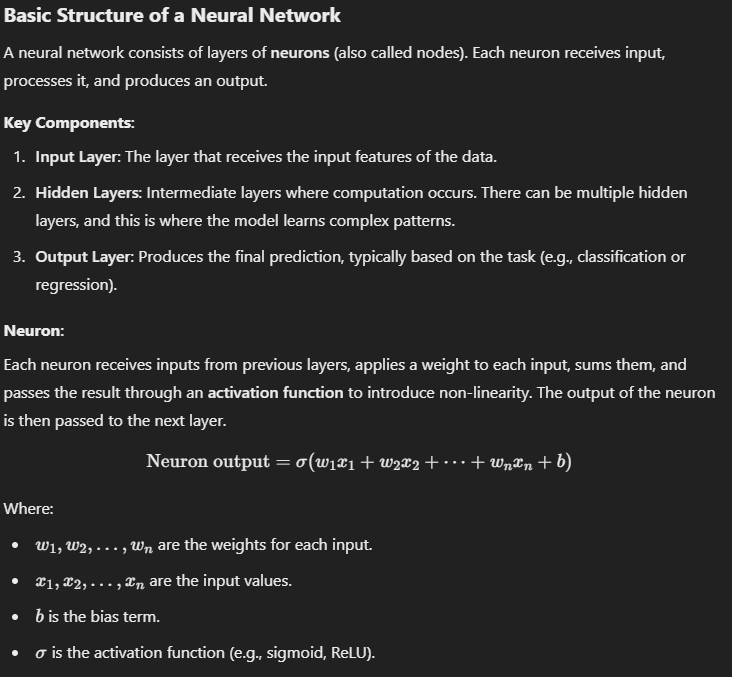



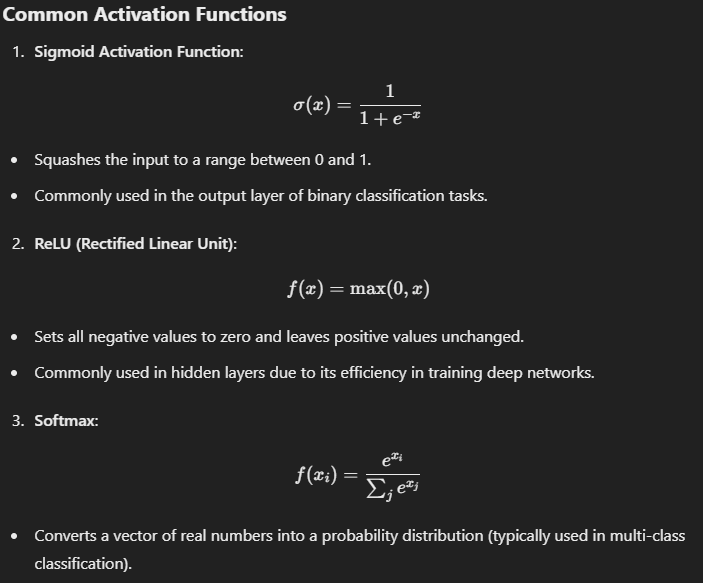

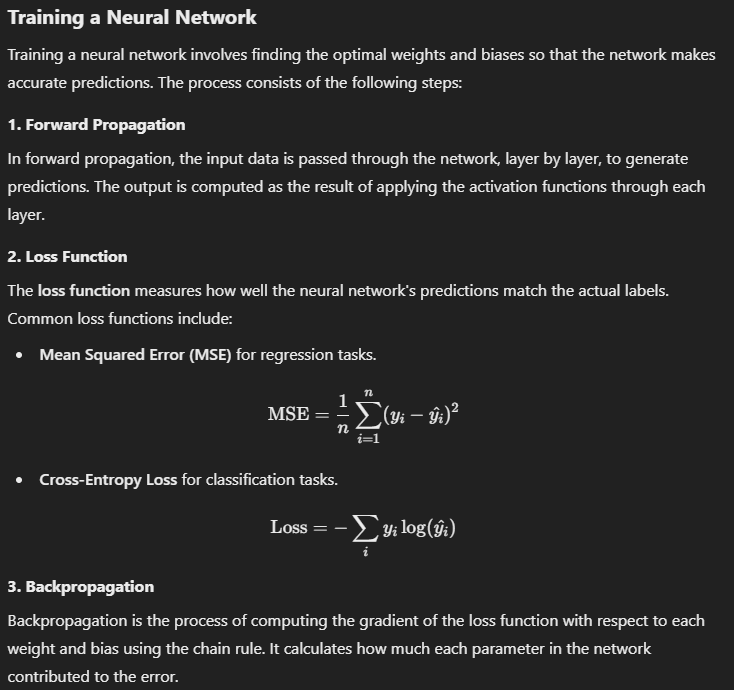

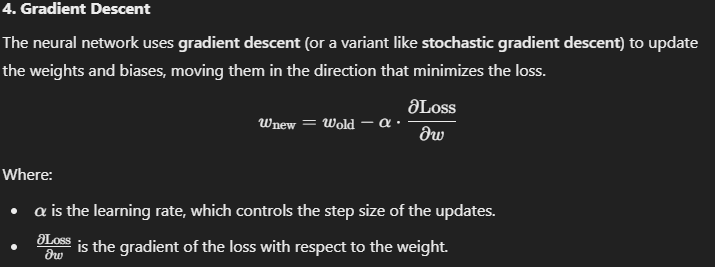

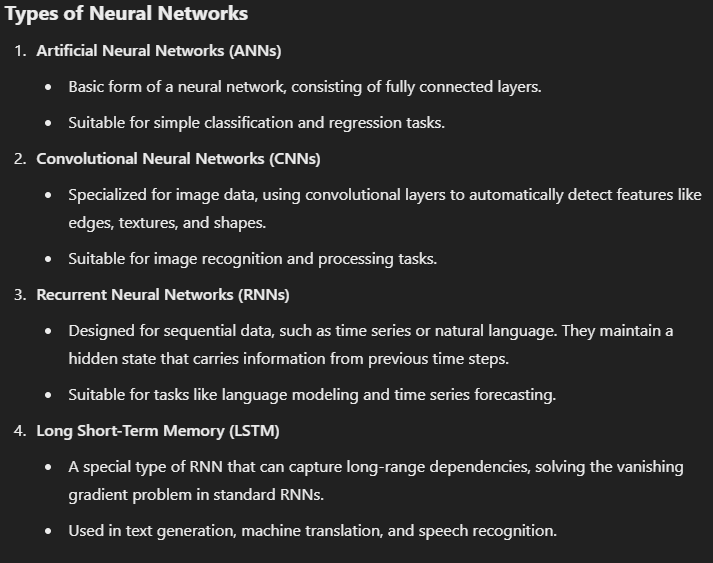

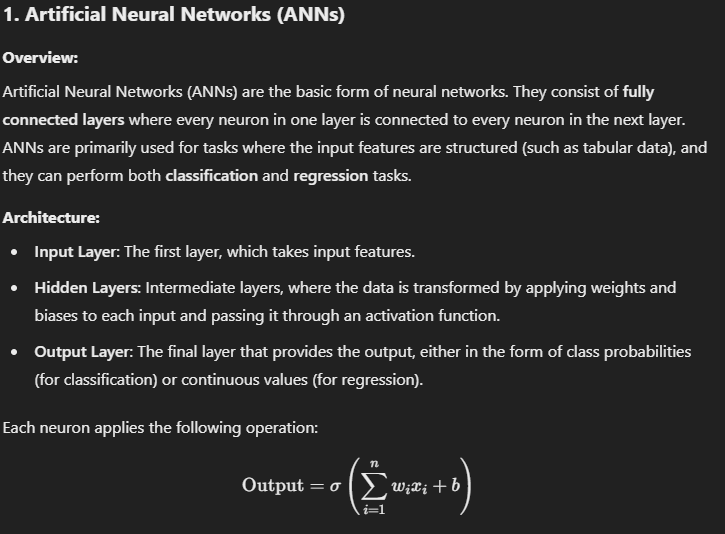
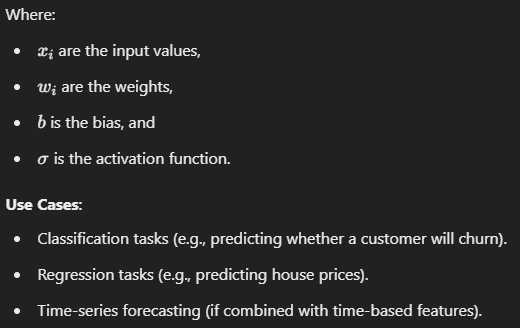

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generating synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building an Artificial Neural Network (ANN)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6413 - accuracy: 0.6725 - val_loss: 0.5918 - val_accuracy: 0.7600
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.8025 - val_loss: 0.4609 - val_accuracy: 0.8050
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8462 - val_loss: 0.3813 - val_accuracy: 0.8350
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8775 - val_loss: 0.3393 - val_accuracy: 0.8550
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.8963 - val_loss: 0.3296 - val_accuracy: 0.8350
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9112 - val_loss: 0.2835 - val_accuracy: 0.8750
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9275 - val_loss: 0.2582 - val_accuracy: 0.9050
Epoch 8/10
25/25 [=

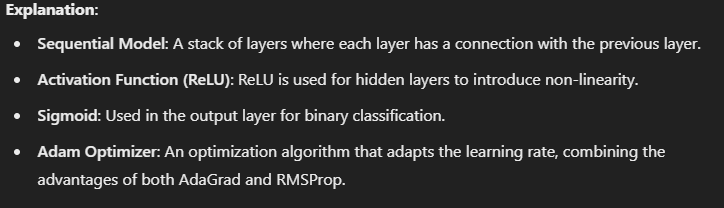

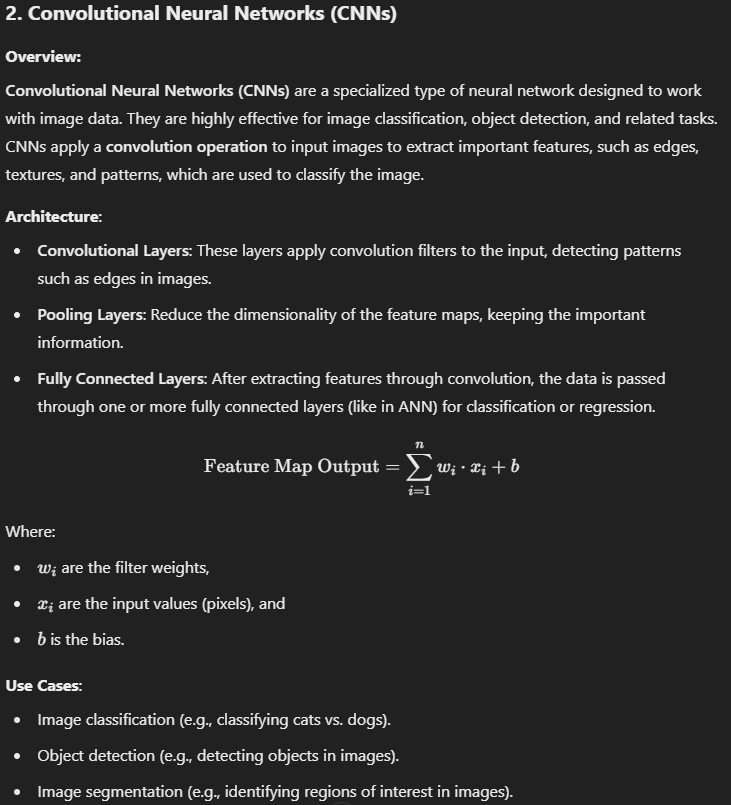

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Loading the dataset (CIFAR-10 dataset of images)
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Building the Convolutional Neural Network (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding Dense layers (fully connected)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5313 - accuracy: 0.4427 - val_loss: 1.2678 - val_accuracy: 0.5471
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1901 - accuracy: 0.5790 - val_loss: 1.1364 - val_accuracy: 0.5969
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0332 - accuracy: 0.6350 - val_loss: 1.0043 - val_accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9289 - accuracy: 0.6748 - val_loss: 1.0502 - val_accuracy: 0.6474
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8519 - accuracy: 0.7002 - val_loss: 0.9033 - val_accuracy: 0.6905
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7966 - accuracy: 0.7216 - val_loss: 0.8593 - val_accuracy: 0.7012
Epoch 7/10
1563/1563 [==============================] - 13s 8ms

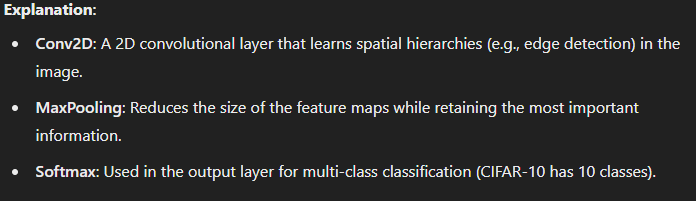

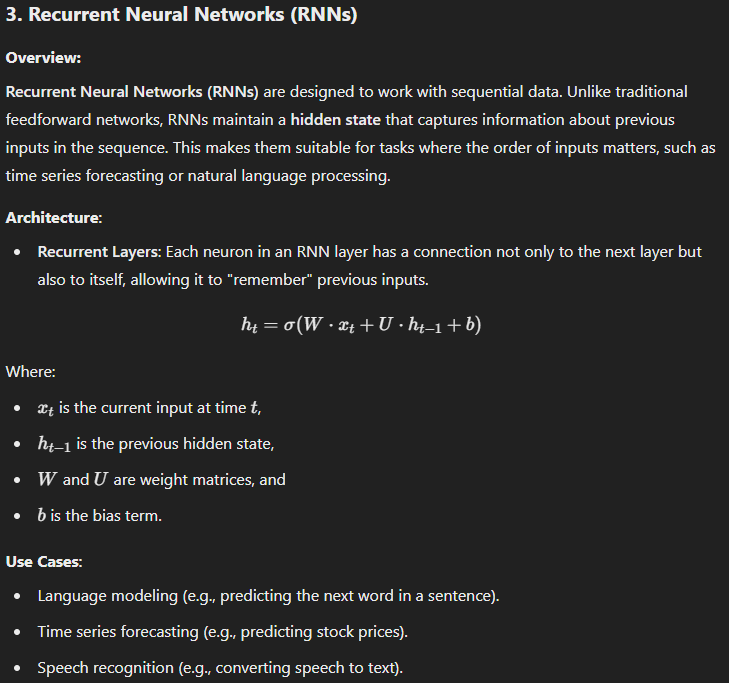

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Generating synthetic sequential data (time series)
X = np.random.rand(1000, 10, 1)  # 1000 samples, each with 10 time steps, 1 feature
y = np.random.randint(0, 2, size=(1000,))  # Binary target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Recurrent Neural Network (RNN)
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
25/25 [==============================] - 1s 14ms/step - loss: 0.6961 - accuracy: 0.4988 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6971 - val_accuracy: 0.4750
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5163 - val_loss: 0.6984 - val_accuracy: 0.4300
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5325 - val_loss: 0.6992 - val_accuracy: 0.4300
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5213 - val_loss: 0.7010 - val_accuracy: 0.4150
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5550 - val_loss: 0.7017 - val_accuracy: 0.4350
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5638 - val_loss: 0.7034 - val_accuracy: 0.4100
Epoch 8/10
25/25 [=

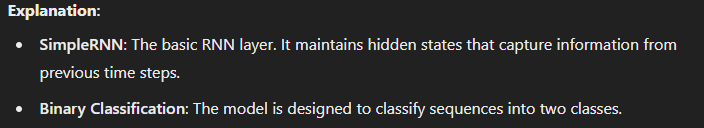

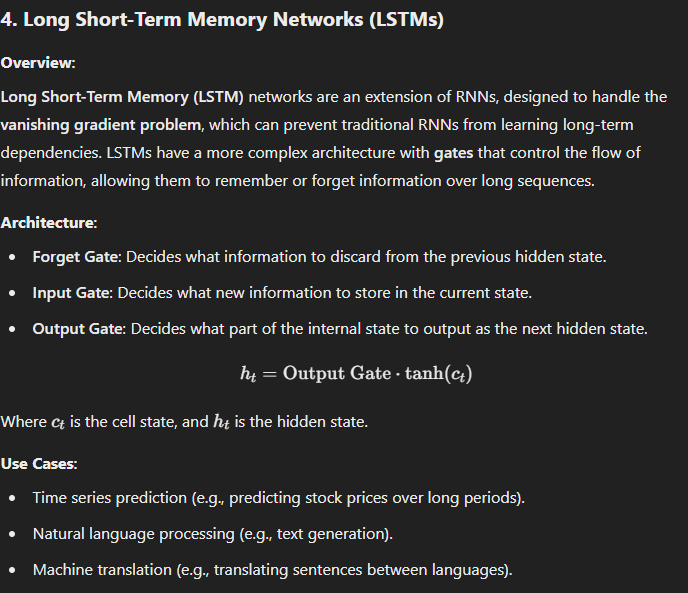

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Generating synthetic sequential data (time series)
X = np.random.rand(1000, 10, 1)  # 1000 samples, each with 10 time steps, 1 feature
y = np.random.randint(0, 2, size=(1000,))  # Binary target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Long Short-Term Memory (LSTM) network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
25/25 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.4762 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6937 - val_accuracy: 0.4600
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6941 - val_accuracy: 0.4600
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5075 - val_loss: 0.6954 - val_accuracy: 0.4600
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5075 - val_loss: 0.6937 - val_accuracy: 0.4600
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6940 - val_accuracy: 0.4600
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6947 - val_accuracy: 0.4600
Epoch 8/10
25/25 [=

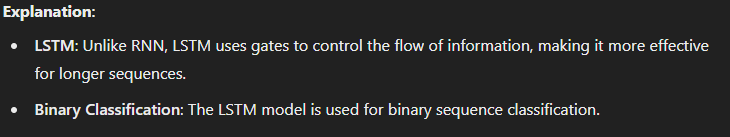

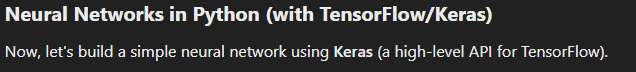

In [5]:
#Artificial Neural Network for Classification
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = Sequential()

# Input layer + Hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.6774 - accuracy: 0.5888 - val_loss: 0.6219 - val_accuracy: 0.7650
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.7900 - val_loss: 0.5097 - val_accuracy: 0.8350
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8313 - val_loss: 0.4249 - val_accuracy: 0.8300
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8700 - val_loss: 0.3478 - val_accuracy: 0.8550
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2739 - accuracy: 0.8988 - val_loss: 0.3177 - val_accuracy: 0.8700
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9212 - val_loss: 0.2864 - val_accuracy: 0.8800
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.9425 - val_loss: 0.2460 - val_accuracy: 0.9050
Epoch 8/10
25/25 [=

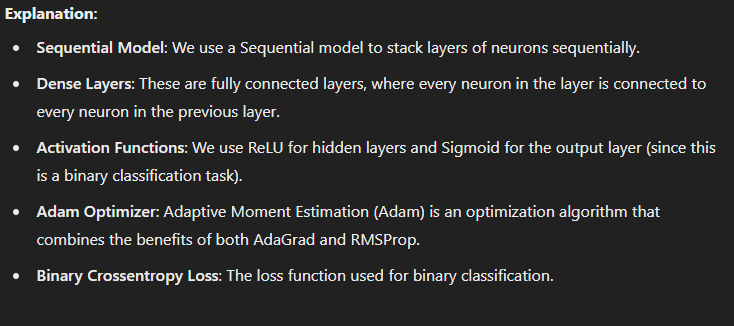

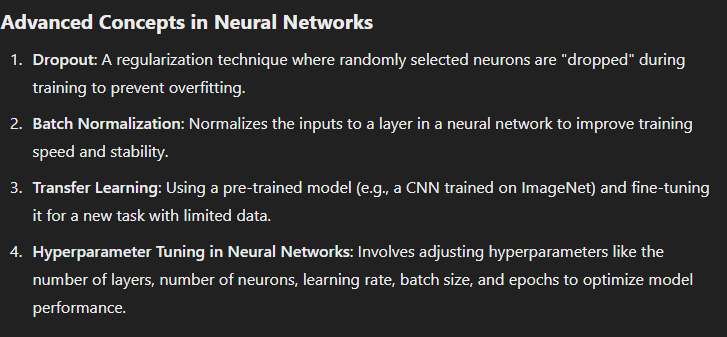

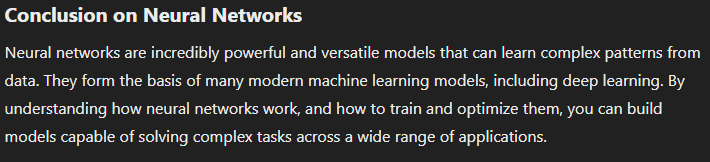